In [62]:
!cd .. && mkdir build
!cd ../build/ && rm -rf *
!cd ../build && cmake \
  -DPYTHON_EXECUTABLE="$(which python)" \
  -DCMAKE_BUILD_TYPE=Release ..
!cd ../build && make install

mkdir: cannot create directory ‘build’: File exists
-- The C compiler identification is GNU 9.3.0
-- The CXX compiler identification is GNU 9.3.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
Release mode
-- Found PythonInterp: /home/lucas/metodos-tp2/tpenv/bin/python (found version "3.8.5") 
-- Found PythonLibs: /usr/lib/x86_64-linux-gnu/libpython3.8.so
-- pybind11 v2.2.4
-- Performing Test HAS_FLTO
-- Performing Test HAS_FLTO - Success
-- LTO enabled
CMAKE_INSTALL_PREFIX=/home/lucas/metodos-tp2
-- Configuring done
-- Generating done
-- Bu

Realizamos los imports de funciones de Python necesarios 



In [1]:
!pwd
!python --version
import metnum
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, cohen_kappa_score, f1_score, recall_score
from time import time
from tqdm.auto import tqdm


/home/lucas/metodos-tp2/notebooks
Python 3.8.5


Importamos los datos del TP2 

In [2]:
data_train = pd.read_csv("../data/train.csv")
data_train.shape

(42000, 785)

Trabajamos en un conjunto mas pequeno para determinar cuales son los mejores k y alpha:

In [34]:
a = 3000
data_train_small = data_train.sample(a)
data_train_small.shape


(3000, 785)

Separamos los valores de los pixeles

In [38]:
Dtrain = data_train_small[data_train_small.columns[1:]].values
valtrain = data_train_small["label"].values

Supuestamente es un 2


(100, 785)

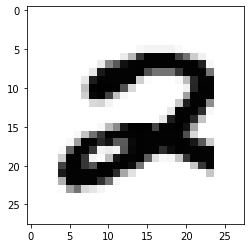

In [39]:
num = np.random.randint(0, a)
print("Supuestamente es un {}".format(int(valtrain[num])))

img = Dtrain[num].reshape(28, 28) 
plt.imshow(img, cmap="Greys")

a = 100
data_train_small = data_train.sample(a)
data_train_small.shape


Chequeamos el balanceo de los valores. 

In [40]:
data_train_small["label"].value_counts(normalize=True)

9    0.13
8    0.12
0    0.10
2    0.10
4    0.10
5    0.10
6    0.10
3    0.09
1    0.08
7    0.08
Name: label, dtype: float64

kNN

In [41]:
def kNN_KFold(k, C, D, val):
    cortes = KFold(n_splits=C) #quiero que esta variable tome K cortes
    cortes.get_n_splits(D) #mandamos nuestro D a nuestra variable que toma C  cortes => Sacamos C cortes de D
    
    Accuracy = []
    Kappa = []
    F1 = []
    Recall = []
    Tiempo = []
    i = 0
    for iTrain, iTest in cortes.split(D):
        i += 1
        # Separamos train y test
        Dtrain, Dtest = D[iTrain], D[iTest] 
        valTrain, valTest = val[iTrain], val[iTest]
        print(f"\nCorte {i}, ")
        # Inicializamos el kNN con las funciones implementadas en el TP 
        kNN = metnum.KNNClassifier(k)
         
        kNNinicio = time() #Arrancamos a medir tiempo 
       
        kNN.fit(Dtrain, valTrain)

        # Predecimos

        pred = kNN.predict(Dtest)
        
        kNNfin = time()
        kNNtiempo = kNNfin - kNNinicio
        Tiempo.append(kNNtiempo)
        
        # Comparo las predicciones con los resultados esperados.

        acc = accuracy_score(valTest, pred)
        kappa = cohen_kappa_score(valTest, pred)
        f1 = f1_score(valTest, pred, average="macro")
        recall = recall_score(valTest, pred, average="macro")
        
        Accuracy.append(acc)
        Kappa.append(kappa)
        F1.append(f1)
        Recall.append(recall)

        print("fin.")
        
        

#     Accuracy = np.asarray(Accuracy)
#     Kappa = np.asarray(Kappa)
#     F1 = np.asarray(F1)
#     Recall = np.asarray(Recall)
#     Tiempo = np.asarray(Tiempo)
    sumaTiempos = np.sum(Tiempo)
    print(f"Tiempo total: {sumaTiempos}")
    return [Accuracy, Kappa, F1, Recall, Tiempo]

Primero estudiamos los k

Quiero calcular con diferentes k
   

In [64]:

C = 11
Accuracy = []
Kappa = []
F1 = []
Recall = []
Tiempo = []
i = 1
for k in range(2,101):
    i+=1
    print(f'## K = {i} de 100\n')
    res = kNN_KFold(k, C, Dtrain, valtrain)
    Accuracy.append(res[0])
    Kappa.append(res[1])
    F1.append(res[2])
    Recall.append(res[3])
    Tiempo.append(res[4])
    print('\n\n')
print("Fin.")

## K = 2 de 100


Corte 1, 
fin.

Corte 2, 
fin.

Corte 3, 
fin.

Corte 4, 
fin.

Corte 5, 
fin.

Corte 6, 
fin.

Corte 7, 
fin.

Corte 8, 
fin.

Corte 9, 
fin.

Corte 10, 
fin.

Corte 11, 
fin.
Tiempo total: 9.205916166305542



## K = 3 de 100


Corte 1, 
fin.

Corte 2, 
fin.

Corte 3, 
fin.

Corte 4, 
fin.

Corte 5, 
fin.

Corte 6, 
fin.

Corte 7, 
fin.

Corte 8, 
fin.

Corte 9, 
fin.

Corte 10, 
fin.

Corte 11, 
fin.
Tiempo total: 9.6359121799469



## K = 4 de 100


Corte 1, 
fin.

Corte 2, 
fin.

Corte 3, 
fin.

Corte 4, 
fin.

Corte 5, 
fin.

Corte 6, 
fin.

Corte 7, 
fin.

Corte 8, 
fin.

Corte 9, 
fin.

Corte 10, 
fin.

Corte 11, 
fin.
Tiempo total: 9.262397766113281



## K = 5 de 100


Corte 1, 
fin.

Corte 2, 
fin.

Corte 3, 
fin.

Corte 4, 
fin.

Corte 5, 
fin.

Corte 6, 
fin.

Corte 7, 
fin.

Corte 8, 
fin.

Corte 9, 
fin.

Corte 10, 
fin.

Corte 11, 
fin.
Tiempo total: 9.235890626907349



## K = 6 de 100


Corte 1, 
fin.

Corte 2, 
fin.

Corte 3, 
fin.

Corte 4, 
fin.



fin.

Corte 8, 
fin.

Corte 9, 
fin.

Corte 10, 
fin.

Corte 11, 
fin.
Tiempo total: 8.390891313552856



## K = 38 de 100


Corte 1, 
fin.

Corte 2, 
fin.

Corte 3, 
fin.

Corte 4, 
fin.

Corte 5, 
fin.

Corte 6, 
fin.

Corte 7, 
fin.

Corte 8, 
fin.

Corte 9, 
fin.

Corte 10, 
fin.

Corte 11, 
fin.
Tiempo total: 8.39173698425293



## K = 39 de 100


Corte 1, 
fin.

Corte 2, 
fin.

Corte 3, 
fin.

Corte 4, 
fin.

Corte 5, 
fin.

Corte 6, 
fin.

Corte 7, 
fin.

Corte 8, 
fin.

Corte 9, 
fin.

Corte 10, 
fin.

Corte 11, 
fin.
Tiempo total: 8.365540027618408



## K = 40 de 100


Corte 1, 
fin.

Corte 2, 
fin.

Corte 3, 
fin.

Corte 4, 
fin.

Corte 5, 
fin.

Corte 6, 
fin.

Corte 7, 
fin.

Corte 8, 
fin.

Corte 9, 
fin.

Corte 10, 
fin.

Corte 11, 
fin.
Tiempo total: 8.322696447372437



## K = 41 de 100


Corte 1, 
fin.

Corte 2, 
fin.

Corte 3, 
fin.

Corte 4, 
fin.

Corte 5, 
fin.

Corte 6, 
fin.

Corte 7, 
fin.

Corte 8, 
fin.

Corte 9, 
fin.

Corte 10, 
fin.

Corte 11, 
fin.
Tiempo

fin.

Corte 2, 
fin.

Corte 3, 
fin.

Corte 4, 
fin.

Corte 5, 
fin.

Corte 6, 
fin.

Corte 7, 
fin.

Corte 8, 
fin.

Corte 9, 
fin.

Corte 10, 
fin.

Corte 11, 
fin.
Tiempo total: 8.31326699256897



## K = 74 de 100


Corte 1, 
fin.

Corte 2, 
fin.

Corte 3, 
fin.

Corte 4, 
fin.

Corte 5, 
fin.

Corte 6, 
fin.

Corte 7, 
fin.

Corte 8, 
fin.

Corte 9, 
fin.

Corte 10, 
fin.

Corte 11, 
fin.
Tiempo total: 8.31402063369751



## K = 75 de 100


Corte 1, 
fin.

Corte 2, 
fin.

Corte 3, 
fin.

Corte 4, 
fin.

Corte 5, 
fin.

Corte 6, 
fin.

Corte 7, 
fin.

Corte 8, 
fin.

Corte 9, 
fin.

Corte 10, 
fin.

Corte 11, 
fin.
Tiempo total: 8.305026292800903



## K = 76 de 100


Corte 1, 
fin.

Corte 2, 
fin.

Corte 3, 
fin.

Corte 4, 
fin.

Corte 5, 
fin.

Corte 6, 
fin.

Corte 7, 
fin.

Corte 8, 
fin.

Corte 9, 
fin.

Corte 10, 
fin.

Corte 11, 
fin.
Tiempo total: 8.332338333129883



## K = 77 de 100


Corte 1, 
fin.

Corte 2, 
fin.

Corte 3, 
fin.

Corte 4, 
fin.

Corte 5, 
fin.

Corte 6,

In [190]:
meanAccuracy = [np.mean(d) for d in Accuracy]
meanKappa = [np.mean(d) for d in Kappa]
meanF1 = [np.mean(d) for d in F1]
meanRecall = [np.mean(d) for d in Recall]
meanTiempo = [np.sum(d) for d in Tiempo]
l=10


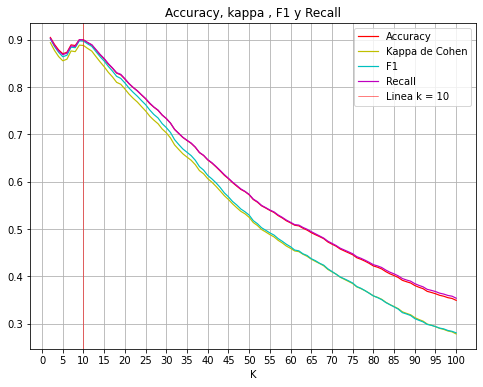

In [191]:
mean = meanAccuracy
mean2 = meanKappa
mean3 = meanF1
mean4 = meanRecall
r = 101
plt.figure(figsize=(8, 6))
plt.plot(range(2,r),mean, c="r", lw=1.2, label='Accuracy')
plt.plot(range(2,r),mean2, c="y", lw=1.2, label='Kappa de Cohen')
plt.plot(range(2,r),mean3, c="c", lw=1.2, label='F1')
plt.plot(range(2,r),mean4, c="m", lw=1.2, label='Recall')

plt.axvline(l, 0,1, c='r',lw='0.5' , label=f'Linea k = {l}')
plt.legend()
plt.grid()
plt.xticks(range(0, r,5))


plt.title('Accuracy, kappa , F1 y Recall')
plt.xlabel('K') 
plt.ylabel('')  
plt.savefig("Imagenes/estudiok-todo.png")
plt.show()


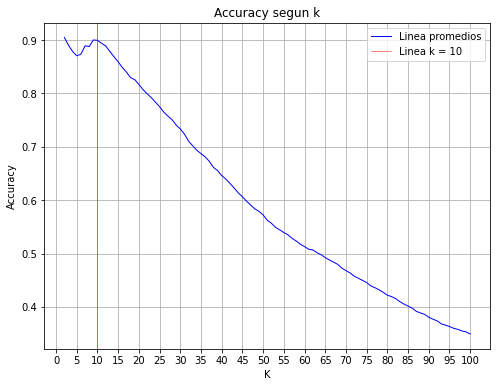

In [192]:
data = Accuracy
mean = meanAccuracy


plt.figure(figsize=(8, 6))
plt.plot(range(2,101),mean, c="b", lw=1, label='Linea promedios')
plt.axvline(l, 0,1, c='r',lw='0.5' , label=f'Linea k = {l}')
plt.legend()
plt.grid()
plt.xticks(range(0, 101, 5))
plt.title('Accuracy segun k')
plt.xlabel('K') 
plt.ylabel('Accuracy')  
plt.savefig("Imagenes/estudiok-accuracy.png")
plt.show()

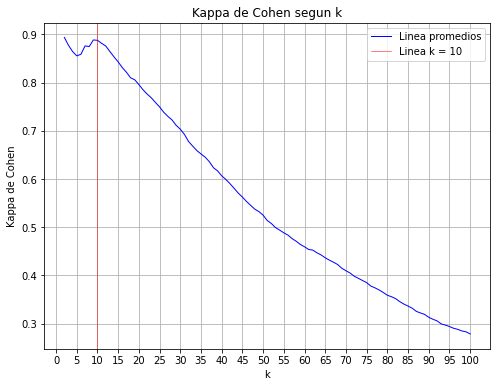

In [193]:
data = Kappa
mean = meanKappa



plt.figure(figsize=(8, 6))
plt.plot(range(2,101),mean, c="b", lw=1, label='Linea promedios')
plt.axvline(l, 0,1, c='r',lw='0.5' , label=f'Linea k = {l}')
plt.legend()
plt.grid()
plt.xticks(range(0, 101, 5))
plt.title('Kappa de Cohen segun k')
plt.xlabel('k') 
plt.ylabel('Kappa de Cohen')  
plt.savefig("Imagenes/estudiok-kappa.png")
plt.show()


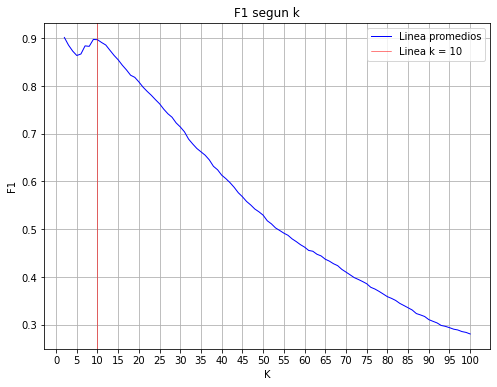

In [194]:
data = F1
mean = meanF1



plt.figure(figsize=(8, 6))
plt.plot(range(2,101),mean, c="b", lw=1, label='Linea promedios')
plt.axvline(l, 0,1, c='r',lw='0.5' , label=f'Linea k = {l}')
plt.legend()
plt.grid()
plt.xticks(range(0, 101, 5))

plt.title('F1 segun k')
plt.xlabel('K') 
plt.ylabel('F1')  
plt.savefig("Imagenes/estudiok-f1.png")
plt.show()

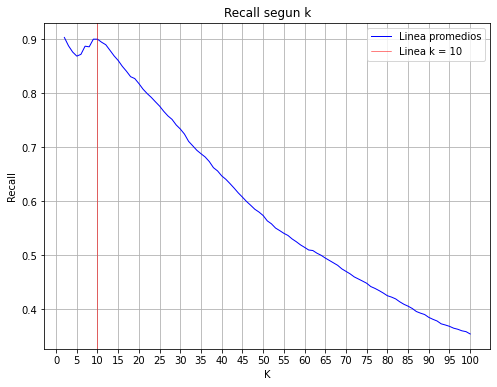

In [195]:
data = Recall
mean = meanRecall


plt.figure(figsize=(8, 6))
plt.plot(range(2,101),mean, c="b", lw=1, label='Linea promedios')
plt.axvline(l, 0,1, c='r',lw='0.5' , label=f'Linea k = {l}')
plt.legend()
plt.grid()
plt.xticks(range(0, 101, 5))


plt.title('Recall segun k')
plt.xlabel('K') 
plt.ylabel('Recall')  
plt.savefig("Imagenes/estudiok-recall.png")
plt.show()

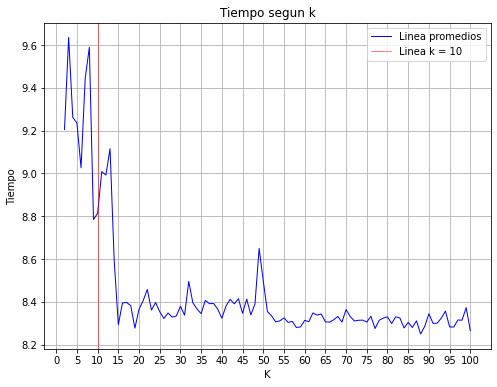

In [196]:
data = Tiempo
mean = meanTiempo


plt.figure(figsize=(8, 6))
plt.plot(range(2,101),mean, c="b", lw=1, label='Linea promedios')
plt.axvline(l, 0,1, c='r',lw='0.5' , label=f'Linea k = {l}')
plt.legend()
plt.grid()
plt.xticks(range(0, 101, 5))



plt.title('Tiempo segun k')
plt.xlabel('K') 
plt.ylabel('Tiempo')  
plt.savefig("Imagenes/estudiok-tiempo.png")
plt.show()

Estudio del alpha en pca

In [217]:

C = 27
k=10
alphas = range(1,41)

Accuracy_A = []
Kappa_A = []
F1_A = []
Recall_A = []
Tiempo_A = []
i = 1
for alpha in alphas:
    
    print(f'## Alpha = {i} de 40\n')
    i+=1
    
    pcaInicio = time()
    pca = metnum.PCA(int(alpha))
    pca.fit(Dtrain)
    Dtrans = pca.transform(Dtrain)
    
    res = kNN_KFold(k, C, Dtrans, valtrain)
    pcaFin = time()
    pcaTiempo = pcaFin - pcaInicio
    
    Accuracy_A.append(res[0])
    Kappa_A.append(res[1])
    F1_A.append(res[2])
    Recall_A.append(res[3])
    Tiempo_A.append(pcaTiempo)
    
    print("Fin.")
    print('\n\n')


## Alpha = 1 de 40


Corte 1, 
fin.

Corte 2, 
fin.

Corte 3, 
fin.

Corte 4, 
fin.

Corte 5, 
fin.

Corte 6, 
fin.

Corte 7, 
fin.

Corte 8, 
fin.

Corte 9, 
fin.

Corte 10, 
fin.

Corte 11, 
fin.

Corte 12, 
fin.

Corte 13, 
fin.

Corte 14, 
fin.

Corte 15, 
fin.

Corte 16, 
fin.

Corte 17, 
fin.

Corte 18, 
fin.

Corte 19, 
fin.

Corte 20, 
fin.

Corte 21, 
fin.

Corte 22, 
fin.

Corte 23, 
fin.

Corte 24, 
fin.

Corte 25, 
fin.

Corte 26, 
fin.

Corte 27, 
fin.
Tiempo total: 0.6982650756835938
Fin.



## Alpha = 2 de 40


Corte 1, 
fin.

Corte 2, 
fin.

Corte 3, 
fin.

Corte 4, 
fin.

Corte 5, 
fin.

Corte 6, 
fin.

Corte 7, 
fin.

Corte 8, 
fin.

Corte 9, 
fin.

Corte 10, 
fin.

Corte 11, 
fin.

Corte 12, 
fin.

Corte 13, 
fin.

Corte 14, 
fin.

Corte 15, 
fin.

Corte 16, 
fin.

Corte 17, 
fin.

Corte 18, 
fin.

Corte 19, 
fin.

Corte 20, 
fin.

Corte 21, 
fin.

Corte 22, 
fin.

Corte 23, 
fin.

Corte 24, 
fin.

Corte 25, 
fin.

Corte 26, 
fin.

Corte 27, 
fin.
Tiempo total: 0.703


Corte 1, 
fin.

Corte 2, 
fin.

Corte 3, 
fin.

Corte 4, 
fin.

Corte 5, 
fin.

Corte 6, 
fin.

Corte 7, 
fin.

Corte 8, 
fin.

Corte 9, 
fin.

Corte 10, 
fin.

Corte 11, 
fin.

Corte 12, 
fin.

Corte 13, 
fin.

Corte 14, 
fin.

Corte 15, 
fin.

Corte 16, 
fin.

Corte 17, 
fin.

Corte 18, 
fin.

Corte 19, 
fin.

Corte 20, 
fin.

Corte 21, 
fin.

Corte 22, 
fin.

Corte 23, 
fin.

Corte 24, 
fin.

Corte 25, 
fin.

Corte 26, 
fin.

Corte 27, 
fin.
Tiempo total: 0.8050124645233154
Fin.



## Alpha = 18 de 40


Corte 1, 
fin.

Corte 2, 
fin.

Corte 3, 
fin.

Corte 4, 
fin.

Corte 5, 
fin.

Corte 6, 
fin.

Corte 7, 
fin.

Corte 8, 
fin.

Corte 9, 
fin.

Corte 10, 
fin.

Corte 11, 
fin.

Corte 12, 
fin.

Corte 13, 
fin.

Corte 14, 
fin.

Corte 15, 
fin.

Corte 16, 
fin.

Corte 17, 
fin.

Corte 18, 
fin.

Corte 19, 
fin.

Corte 20, 
fin.

Corte 21, 
fin.

Corte 22, 
fin.

Corte 23, 
fin.

Corte 24, 
fin.

Corte 25, 
fin.

Corte 26, 
fin.

Corte 27, 
fin.
Tiempo total: 0.8042623996734619
Fin.


fin.

Corte 7, 
fin.

Corte 8, 
fin.

Corte 9, 
fin.

Corte 10, 
fin.

Corte 11, 
fin.

Corte 12, 
fin.

Corte 13, 
fin.

Corte 14, 
fin.

Corte 15, 
fin.

Corte 16, 
fin.

Corte 17, 
fin.

Corte 18, 
fin.

Corte 19, 
fin.

Corte 20, 
fin.

Corte 21, 
fin.

Corte 22, 
fin.

Corte 23, 
fin.

Corte 24, 
fin.

Corte 25, 
fin.

Corte 26, 
fin.

Corte 27, 
fin.
Tiempo total: 0.8658084869384766
Fin.



## Alpha = 34 de 40


Corte 1, 
fin.

Corte 2, 
fin.

Corte 3, 
fin.

Corte 4, 
fin.

Corte 5, 
fin.

Corte 6, 
fin.

Corte 7, 
fin.

Corte 8, 
fin.

Corte 9, 
fin.

Corte 10, 
fin.

Corte 11, 
fin.

Corte 12, 
fin.

Corte 13, 
fin.

Corte 14, 
fin.

Corte 15, 
fin.

Corte 16, 
fin.

Corte 17, 
fin.

Corte 18, 
fin.

Corte 19, 
fin.

Corte 20, 
fin.

Corte 21, 
fin.

Corte 22, 
fin.

Corte 23, 
fin.

Corte 24, 
fin.

Corte 25, 
fin.

Corte 26, 
fin.

Corte 27, 
fin.
Tiempo total: 0.877410888671875
Fin.



## Alpha = 35 de 40


Corte 1, 
fin.

Corte 2, 
fin.

Corte 3, 
fin.

Corte 4, 
fin.

Cor

In [348]:
meanAccuracy_A = [np.mean(d) for d in Accuracy_A]
meanKappa_A = [np.mean(d) for d in Kappa_A]
meanF1_A = [np.mean(d) for d in F1_A]
meanRecall_A = [np.mean(d) for d in Recall_A]
# meanTiempo_A = [np.mean(d) for d in Tiempo_A]
l=24

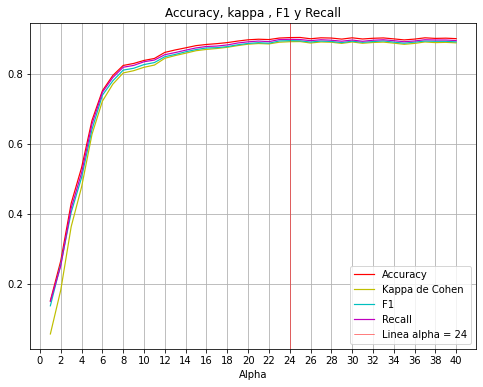

In [349]:
mean = meanAccuracy_A
mean2 = meanKappa_A
mean3 = meanF1_A
mean4 = meanRecall_A
r = 41
plt.figure(figsize=(8, 6))
plt.plot(range(1,r),mean, c="r", lw=1.2, label='Accuracy')
plt.plot(range(1,r),mean2, c="y", lw=1.2, label='Kappa de Cohen')
plt.plot(range(1,r),mean3, c="c", lw=1.2, label='F1')
plt.plot(range(1,r),mean4, c="m", lw=1.2, label='Recall')
plt.axvline(l, 0,1, c='r',lw='0.5' , label=f'Linea alpha = {l}')
plt.legend()
plt.grid()
plt.xticks(range(0, r,2))


plt.title('Accuracy, kappa , F1 y Recall')
plt.xlabel('Alpha') 
plt.ylabel('')  
plt.savefig("Imagenes/estudioalpha-todo.png")
plt.show()


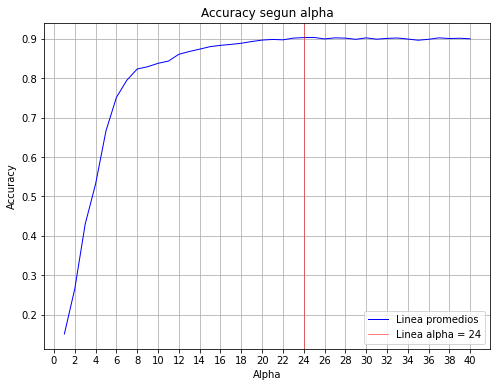

In [350]:
data = Accuracy_A
mean = meanAccuracy_A


plt.figure(figsize=(8, 6))
plt.plot(range(1,41),mean, c="b", lw=1, label='Linea promedios')
plt.axvline(l, 0,1, c='r',lw='0.5' , label=f'Linea alpha = {l}')
plt.legend()
plt.grid()
plt.xticks(range(0, 41,2))
plt.title('Accuracy segun alpha')
plt.xlabel('Alpha') 
plt.ylabel('Accuracy')  
plt.savefig("Imagenes/estudioalpha-accuracy.png")
plt.show()

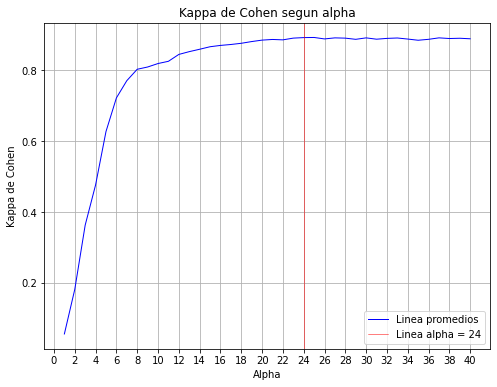

In [351]:
data = Kappa_A
mean = meanKappa_A



plt.figure(figsize=(8, 6))
plt.plot(range(1,41),mean, c="b", lw=1, label='Linea promedios')
plt.axvline(l, 0,1, c='r',lw='0.5' , label=f'Linea alpha = {l}')
plt.legend()
plt.grid()
plt.xticks(range(0, 41,2))
plt.title('Kappa de Cohen segun alpha')
plt.xlabel('Alpha') 
plt.ylabel('Kappa de Cohen')    
plt.savefig("Imagenes/estudioalpha-kappa.png")
plt.show()

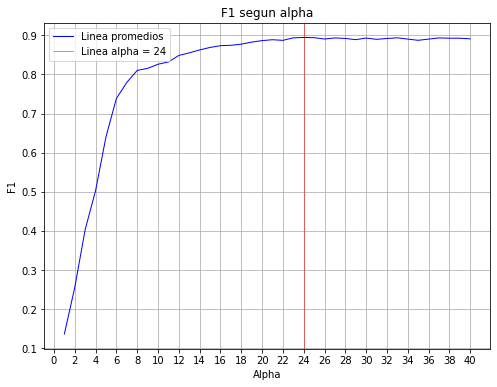

In [352]:
data = F1_A
mean = meanF1_A



plt.figure(figsize=(8, 6))
plt.plot(range(1,41),mean, c="b", lw=1, label='Linea promedios')
plt.axvline(l, 0,1, c='r',lw='0.5' , label=f'Linea alpha = {l}')
plt.legend()
plt.grid()
plt.xticks(range(0, 41,2))

plt.title('F1 segun alpha')
plt.xlabel('Alpha') 
plt.ylabel('F1')    
plt.savefig("Imagenes/estudioalpha-f1.png")
plt.show()

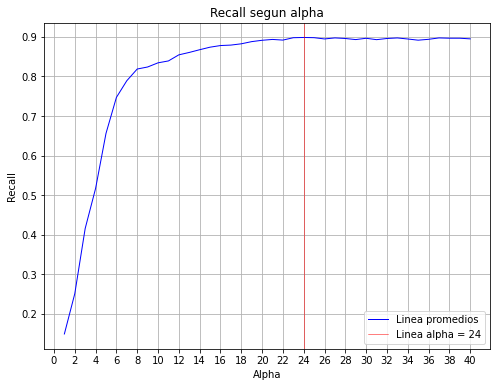

In [353]:
data = Recall_A
mean = meanRecall_A


plt.figure(figsize=(8, 6))
plt.plot(range(1,41),mean, c="b", lw=1, label='Linea promedios')
plt.axvline(l, 0,1, c='r',lw='0.5' , label=f'Linea alpha = {l}')
plt.legend()
plt.grid()
plt.xticks(range(0, 41,2))


plt.title('Recall segun alpha')
plt.xlabel('Alpha') 
plt.ylabel('Recall')  
plt.savefig("Imagenes/estudioalpha-recall.png")
plt.show()

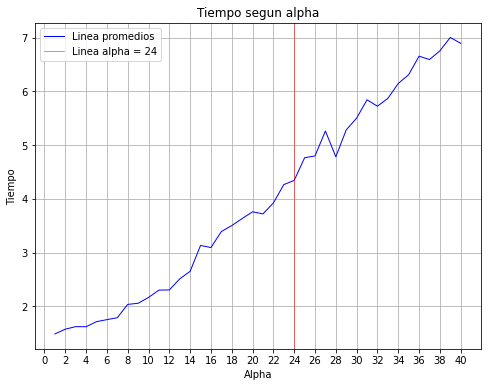

In [354]:

mean = Tiempo_A


plt.figure(figsize=(8, 6))
plt.plot(range(1,41),mean, c="b", lw=1, label='Linea promedios')
plt.axvline(l, 0,1, c='r',lw='0.5' , label=f'Linea alpha = {l}')
plt.legend()
plt.grid()
plt.xticks(range(0, 41,2))



plt.title('Tiempo segun alpha')
plt.xlabel('Alpha') 
plt.ylabel('Tiempo')  
plt.savefig("Imagenes/estudioalpha-tiempo.png")
plt.show()




Veamos cual C es el mas optimo

In [72]:

k = 10
Accuracy_C = []
Kappa_C = []
F1_C = []
Recall_C = []
Tiempo_C = []
i = 1
for C in tqdm(range(2,41)):
    i+=1
    print(f'## C = {i} de 40\n')
    CInicio = time()
    res = kNN_KFold(k, C, Dtrain, valtrain)
    CFin = time()
    CTiempo = CFin - CInicio
    Accuracy_C.append(res[0])
    Kappa_C.append(res[1])
    F1_C.append(res[2])
    Recall_C.append(res[3])
    Tiempo_C.append(CTiempo)
    print('\n\n')
print("Fin.")




  0%|          | 0/39 [00:00<?, ?it/s]

## C = 2 de 40


Corte 1, 
fin.

Corte 2, 
fin.
Tiempo total: 3.3250555992126465



## C = 3 de 40


Corte 1, 
fin.

Corte 2, 
fin.

Corte 3, 
fin.
Tiempo total: 6.032379150390625



## C = 4 de 40


Corte 1, 
fin.

Corte 2, 
fin.

Corte 3, 
fin.

Corte 4, 
fin.
Tiempo total: 6.85063099861145



## C = 5 de 40


Corte 1, 
fin.

Corte 2, 
fin.

Corte 3, 
fin.

Corte 4, 
fin.

Corte 5, 
fin.
Tiempo total: 7.306741952896118



## C = 6 de 40


Corte 1, 
fin.

Corte 2, 
fin.

Corte 3, 
fin.

Corte 4, 
fin.

Corte 5, 
fin.

Corte 6, 
fin.
Tiempo total: 7.635510444641113



## C = 7 de 40


Corte 1, 
fin.

Corte 2, 
fin.

Corte 3, 
fin.

Corte 4, 
fin.

Corte 5, 
fin.

Corte 6, 
fin.

Corte 7, 
fin.
Tiempo total: 7.865023136138916



## C = 8 de 40


Corte 1, 
fin.

Corte 2, 
fin.

Corte 3, 
fin.

Corte 4, 
fin.

Corte 5, 
fin.

Corte 6, 
fin.

Corte 7, 
fin.

Corte 8, 
fin.
Tiempo total: 8.045439004898071



## C = 9 de 40


Corte 1, 
fin.

Corte 2, 
fin.

Corte 3, 
fin.

Corte 4, 
fin.

Co

fin.

Corte 9, 
fin.

Corte 10, 
fin.

Corte 11, 
fin.

Corte 12, 
fin.

Corte 13, 
fin.

Corte 14, 
fin.

Corte 15, 
fin.

Corte 16, 
fin.

Corte 17, 
fin.

Corte 18, 
fin.

Corte 19, 
fin.

Corte 20, 
fin.

Corte 21, 
fin.

Corte 22, 
fin.

Corte 23, 
fin.

Corte 24, 
fin.

Corte 25, 
fin.

Corte 26, 
fin.

Corte 27, 
fin.

Corte 28, 
fin.

Corte 29, 
fin.
Tiempo total: 9.201708793640137



## C = 30 de 40


Corte 1, 
fin.

Corte 2, 
fin.

Corte 3, 
fin.

Corte 4, 
fin.

Corte 5, 
fin.

Corte 6, 
fin.

Corte 7, 
fin.

Corte 8, 
fin.

Corte 9, 
fin.

Corte 10, 
fin.

Corte 11, 
fin.

Corte 12, 
fin.

Corte 13, 
fin.

Corte 14, 
fin.

Corte 15, 
fin.

Corte 16, 
fin.

Corte 17, 
fin.

Corte 18, 
fin.

Corte 19, 
fin.

Corte 20, 
fin.

Corte 21, 
fin.

Corte 22, 
fin.

Corte 23, 
fin.

Corte 24, 
fin.

Corte 25, 
fin.

Corte 26, 
fin.

Corte 27, 
fin.

Corte 28, 
fin.

Corte 29, 
fin.

Corte 30, 
fin.
Tiempo total: 9.270543098449707



## C = 31 de 40


Corte 1, 
fin.

Corte 2, 
fin.

C

In [204]:
meanAccuracy_C = [np.mean(d) for d in Accuracy_C]
meanKappa_C = [np.mean(d) for d in Kappa_C]
meanF1_C = [np.mean(d) for d in F1_C]
meanRecall_C = [np.mean(d) for d in Recall_C]
l=27

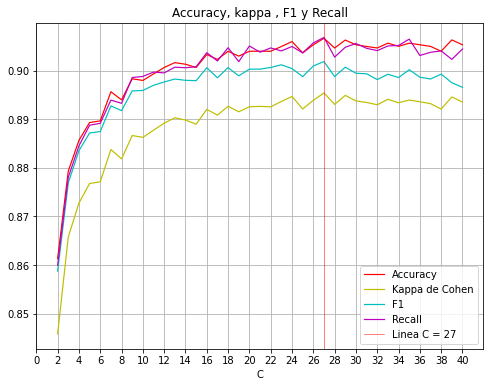

In [205]:
mean = meanAccuracy_C
mean2 = meanKappa_C
mean3 = meanF1_C
mean4 = meanRecall_C
r = 41
plt.figure(figsize=(8, 6))
plt.plot(range(2,r),mean, c="r", lw=1.2, label='Accuracy')
plt.plot(range(2,r),mean2, c="y", lw=1.2, label='Kappa de Cohen')
plt.plot(range(2,r),mean3, c="c", lw=1.2, label='F1')
plt.plot(range(2,r),mean4, c="m", lw=1.2, label='Recall')

plt.axvline(l, 0,1, c='r',lw='0.5' , label=f'Linea C = {l}')
plt.legend()
plt.grid()
plt.xticks(range(0, r,2))


plt.title('Accuracy, kappa , F1 y Recall')
plt.xlabel('C') 
plt.ylabel('')  
plt.savefig("Imagenes/estudiokfold-todo.png")
plt.show()


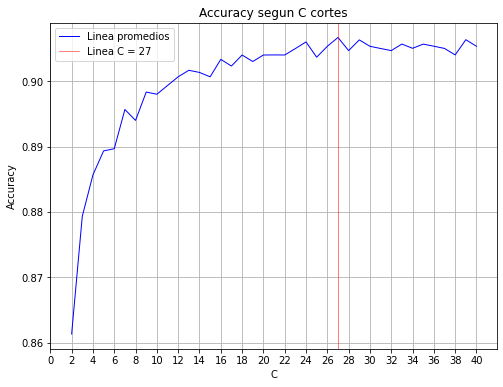

In [206]:
data = Accuracy_C
mean = meanAccuracy_C


plt.figure(figsize=(8, 6))
plt.plot(range(2,41),mean, c="b", lw=1, label='Linea promedios')
plt.axvline(l, 0,1, c='r',lw='0.5' , label=f'Linea C = {l}')
plt.legend()
plt.grid()
plt.xticks(range(0, 41,2))
plt.title('Accuracy segun C cortes')
plt.xlabel('C') 
plt.ylabel('Accuracy')  
plt.savefig("Imagenes/estudiokfold-accuracy.png")
plt.show()

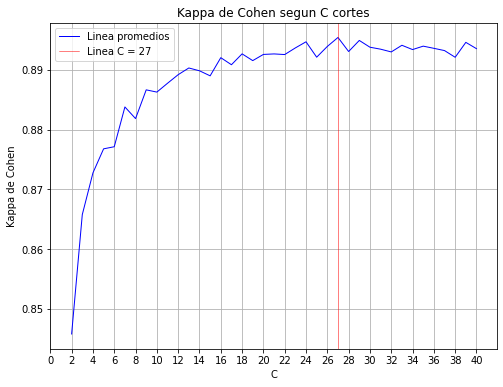

In [207]:
data = Kappa_C
mean = meanKappa_C

plt.figure(figsize=(8, 6))
plt.plot(range(2,41),mean, c="b", lw=1, label='Linea promedios')
plt.axvline(l, 0,1, c='r',lw='0.5' , label=f'Linea C = {l}')
plt.legend()
plt.grid()
plt.xticks(range(0, 41,2))
plt.title('Kappa de Cohen segun C cortes')
plt.xlabel('C') 
plt.ylabel('Kappa de Cohen')  
plt.savefig("Imagenes/estudiokfold-kappa.png")
plt.show()

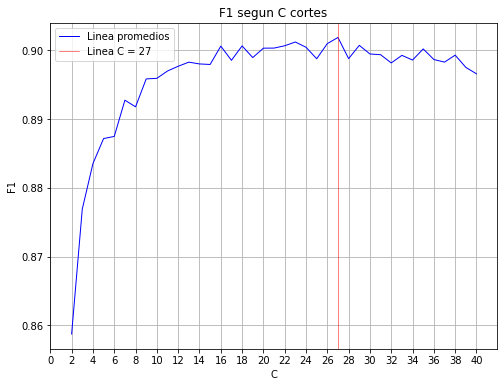

In [208]:
data = F1_C
mean = meanF1_C



plt.figure(figsize=(8, 6))
plt.plot(range(2,41),mean, c="b", lw=1, label='Linea promedios')
plt.axvline(l, 0,1, c='r',lw='0.5' , label=f'Linea C = {l}')
plt.legend()
plt.grid()
plt.xticks(range(0, 41,2))

plt.title('F1 segun C cortes')
plt.xlabel('C') 
plt.ylabel('F1')  
plt.savefig("Imagenes/estudiokfold-f1.png")
plt.show()

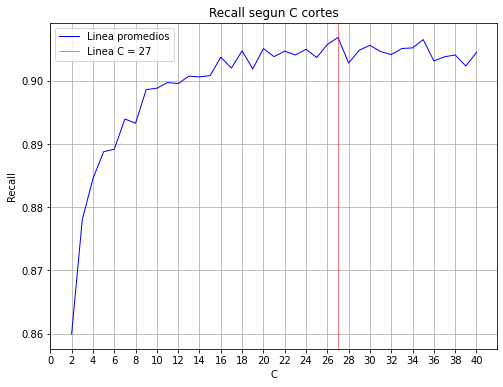

In [209]:
data = Recall_C
mean = meanRecall_C


plt.figure(figsize=(8, 6))
plt.plot(range(2,41),mean, c="b", lw=1, label='Linea promedios')
plt.axvline(l, 0,1, c='r',lw='0.5' , label=f'Linea C = {l}')
plt.legend()
plt.grid()
plt.xticks(range(0, 41,2))


plt.title('Recall segun C cortes')
plt.xlabel('C') 
plt.ylabel('Recall')  
plt.savefig("Imagenes/estudiokfold-recall.png")
plt.show()

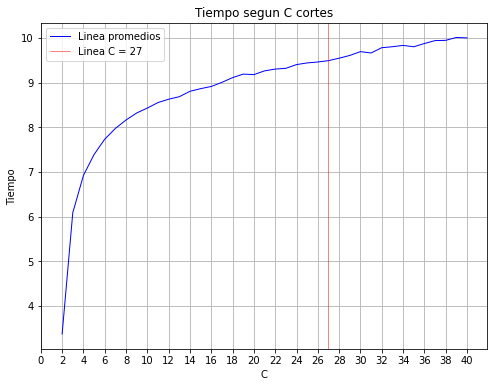

In [210]:
mean = Tiempo_C


plt.figure(figsize=(8, 6))
plt.plot(range(2,41),mean, c="b", lw=1, label='Linea promedios')
plt.axvline(l, 0,1, c='r',lw='0.5' , label=f'Linea C = {l}')
plt.legend()
plt.grid()
plt.xticks(range(0, 41,2))



plt.title('Tiempo segun C cortes')
plt.xlabel('C') 
plt.ylabel('Tiempo')  
plt.savefig("Imagenes/estudiokfold-tiempo.png")
plt.show()

In [ ]:
Estudio con diferentes tamanos

In [306]:
k = 10
C= 27
tam = [6000,12000,18000,24000,30000,36000,42000]
Accuracy_T = []
Kappa_T = []
F1_T = []
Recall_T = []
Tiempo_T = []
for t in tam:
    datos = data_train.sample(t)
    Dtrain_t = datos[datos.columns[1:]].values
    valtrain_t = datos["label"].values
    print(f'## Tam = {t} \n')
    
    tInicio = time()
    res = kNN_KFold(k, C, Dtrain_t, valtrain_t)
    tFin = time()
    tTiempo = tFin - tInicio
    
    Accuracy_T.append(res[0])
    Kappa_T.append(res[1])
    F1_T.append(res[2])
    Recall_T.append(res[3])
    Tiempo_T.append(tTiempo)
    print('\n\n')
print("Fin.")



## Tam = 6000 


Corte 1, 
fin.

Corte 2, 
fin.

Corte 3, 
fin.

Corte 4, 
fin.

Corte 5, 
fin.

Corte 6, 
fin.

Corte 7, 
fin.

Corte 8, 
fin.

Corte 9, 
fin.

Corte 10, 
fin.

Corte 11, 
fin.

Corte 12, 
fin.

Corte 13, 
fin.

Corte 14, 
fin.

Corte 15, 
fin.

Corte 16, 
fin.

Corte 17, 
fin.

Corte 18, 
fin.

Corte 19, 
fin.

Corte 20, 
fin.

Corte 21, 
fin.

Corte 22, 
fin.

Corte 23, 
fin.

Corte 24, 
fin.

Corte 25, 
fin.

Corte 26, 
fin.

Corte 27, 
fin.
Tiempo total: 47.766120195388794



## Tam = 12000 


Corte 1, 
fin.

Corte 2, 
fin.

Corte 3, 
fin.

Corte 4, 
fin.

Corte 5, 
fin.

Corte 6, 
fin.

Corte 7, 
fin.

Corte 8, 
fin.

Corte 9, 
fin.

Corte 10, 
fin.

Corte 11, 
fin.

Corte 12, 
fin.

Corte 13, 
fin.

Corte 14, 
fin.

Corte 15, 
fin.

Corte 16, 
fin.

Corte 17, 
fin.

Corte 18, 
fin.

Corte 19, 
fin.

Corte 20, 
fin.

Corte 21, 
fin.

Corte 22, 
fin.

Corte 23, 
fin.

Corte 24, 
fin.

Corte 25, 
fin.

Corte 26, 
fin.

Corte 27, 
fin.
Tiempo total: 186.3864729404449

In [321]:
meanAccuracy_T = [np.mean(d) for d in Accuracy_T]
meanKappa_T = [np.mean(d) for d in Kappa_T]
meanF1_T = [np.mean(d) for d in F1_T]
meanRecall_T = [np.mean(d) for d in Recall_T]
l=7
listaTamaños = tam

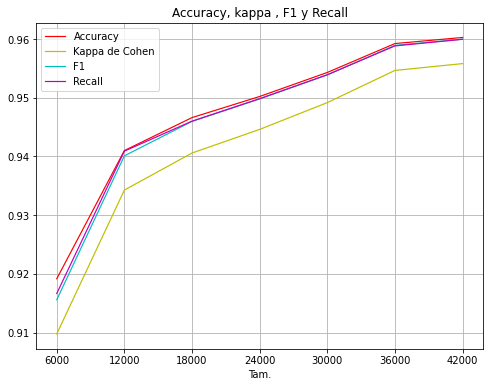

In [322]:
mean = meanAccuracy_T
mean2 = meanKappa_T
mean3 = meanF1_T
mean4 = meanRecall_T
r = 8
plt.figure(figsize=(8, 6))
plt.plot(range(1,r),mean, c="r", lw=1.2, label='Accuracy')
plt.plot(range(1,r),mean2, c="y", lw=1.2, label='Kappa de Cohen')
plt.plot(range(1,r),mean3, c="c", lw=1.2, label='F1')
plt.plot(range(1,r),mean4, c="m", lw=1.2, label='Recall')
plt.legend()
plt.grid()
plt.xticks(range(1,8),listaTamaños)


plt.title('Accuracy, kappa , F1 y Recall')
plt.xlabel('Tam.') 
plt.ylabel('')  
plt.savefig("Imagenes/estudiotam-todo.png")
plt.show()


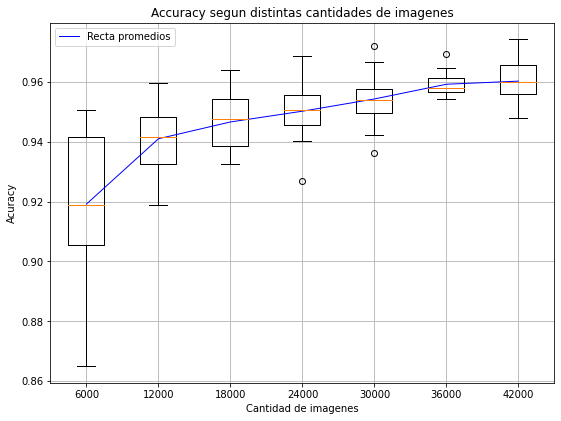

In [323]:
data = Accuracy_T
mean = meanAccuracy_T

fig = plt.figure(figsize =(7, 5))
  
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(data, range(0))
plt.plot()

listaTamaños = tam
plt.plot(range(1,8),mean, c="b", lw=1, label='Recta promedios')
plt.legend()
plt.grid()

plt.xticks(range(1,8),listaTamaños)

plt.title('Accuracy segun distintas cantidades de imagenes')
plt.xlabel('Cantidad de imagenes') 
plt.ylabel('Acuracy')  
plt.savefig("Imagenes/estudiotam-accuracy.png")
plt.show()

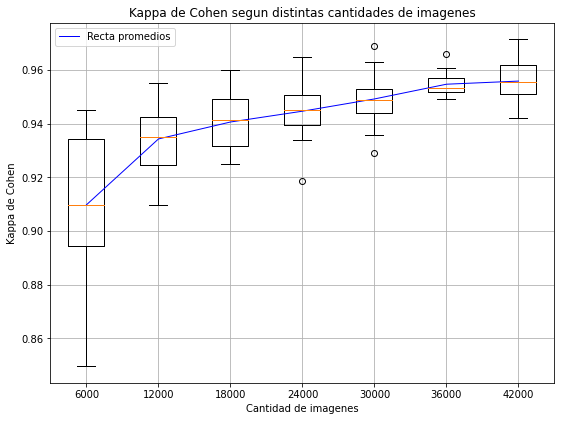

In [324]:
data = Kappa_T
mean = meanKappa_T

fig = plt.figure(figsize =(7, 5))
  
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(data, range(0))
plt.plot()

listaTamaños = tam
plt.plot(range(1,8),mean, c="b", lw=1, label='Recta promedios')
plt.legend()
plt.grid()

plt.xticks(range(1,8),listaTamaños)

plt.title('Kappa de Cohen segun distintas cantidades de imagenes')
plt.xlabel('Cantidad de imagenes') 
plt.ylabel('Kappa de Cohen')  
plt.savefig("Imagenes/estudiotam-kappa.png")
plt.show()

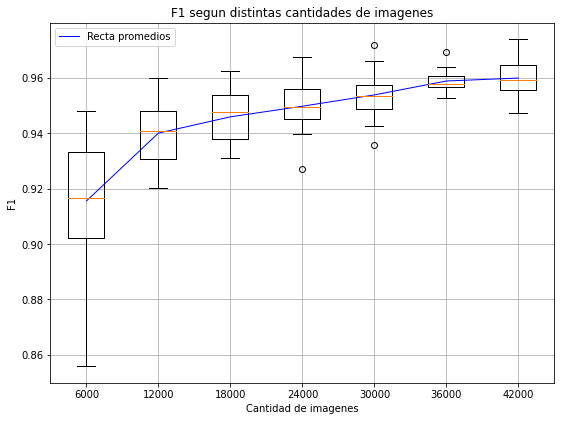

In [325]:
data = F1_T
mean = meanF1_T

fig = plt.figure(figsize =(7, 5))
  
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(data, range(0))
plt.plot()

listaTamaños = tam
plt.plot(range(1,8),mean, c="b", lw=1, label='Recta promedios')
plt.legend()
plt.grid()

plt.xticks(range(1,8),listaTamaños)

plt.title('F1 segun distintas cantidades de imagenes')
plt.xlabel('Cantidad de imagenes') 
plt.ylabel('F1')  

plt.savefig("Imagenes/estudiotam-f1.png")
plt.show()

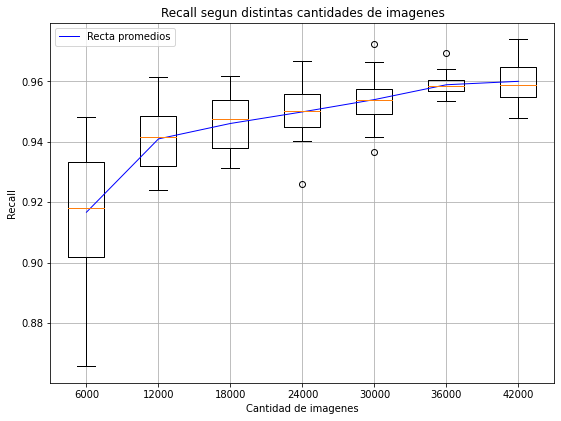

In [326]:
data = Recall_T
mean = meanRecall_T

fig = plt.figure(figsize =(7, 5))
  
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(data, range(0))
plt.plot()

listaTamaños = tam
plt.plot(range(1,8),mean, c="b", lw=1, label='Recta promedios')
plt.legend()
plt.grid()

plt.xticks(range(1,8),listaTamaños)

plt.title('Recall segun distintas cantidades de imagenes')
plt.xlabel('Cantidad de imagenes') 
plt.ylabel('Recall')  
plt.savefig("Imagenes/estudiotam-recall.png")
plt.show()

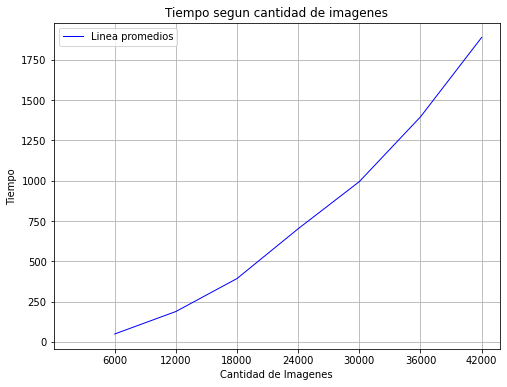

In [327]:

mean = Tiempo_T

plt.figure(figsize=(8, 6))
plt.plot(range(1,8),mean, c="b", lw=1, label='Linea promedios')
plt.legend()
plt.grid()
plt.xticks(range(0, 8))


plt.xticks(range(1,8),listaTamaños)
plt.title('Tiempo segun cantidad de imagenes')
plt.xlabel('Cantidad de Imagenes') 
plt.ylabel('Tiempo')  
plt.savefig("Imagenes/estudiotam-tiempo.png")
plt.show()




estudio de cortes con pca

In [355]:
k = 10
C= 27
alpha = 24
tam = [6000,12000,18000,24000,30000,36000,42000]
Accuracy_PCA = []
Kappa_PCA = []
F1_PCA = []
Recall_PCA = []
Tiempo_PCA = []
for t in tam:
    datos = data_train.sample(t)
    Dtrain_t = datos[datos.columns[1:]].values
    valtrain_t = datos["label"].values
    print(f'## Tam = {t} \n')
    
    pcaInicio = time()
    pca = metnum.PCA(int(alpha))
    pca.fit(Dtrain_t)
    Dtrans = pca.transform(Dtrain_t)
    
    res = kNN_KFold(k, C, Dtrans, valtrain_t)
    
    pcaFin = time()
    pcaTiempo = pcaFin - pcaInicio
    
    Accuracy_PCA.append(res[0])
    Kappa_PCA.append(res[1])
    F1_PCA.append(res[2])
    Recall_PCA.append(res[3])
    Tiempo_PCA.append(pcaTiempo)
    print('\n\n')
print("Fin.")


## Tam = 6000 


Corte 1, 
fin.

Corte 2, 
fin.

Corte 3, 
fin.

Corte 4, 
fin.

Corte 5, 
fin.

Corte 6, 
fin.

Corte 7, 
fin.

Corte 8, 
fin.

Corte 9, 
fin.

Corte 10, 
fin.

Corte 11, 
fin.

Corte 12, 
fin.

Corte 13, 
fin.

Corte 14, 
fin.

Corte 15, 
fin.

Corte 16, 
fin.

Corte 17, 
fin.

Corte 18, 
fin.

Corte 19, 
fin.

Corte 20, 
fin.

Corte 21, 
fin.

Corte 22, 
fin.

Corte 23, 
fin.

Corte 24, 
fin.

Corte 25, 
fin.

Corte 26, 
fin.

Corte 27, 
fin.
Tiempo total: 3.3240292072296143



## Tam = 12000 


Corte 1, 
fin.

Corte 2, 
fin.

Corte 3, 
fin.

Corte 4, 
fin.

Corte 5, 
fin.

Corte 6, 
fin.

Corte 7, 
fin.

Corte 8, 
fin.

Corte 9, 
fin.

Corte 10, 
fin.

Corte 11, 
fin.

Corte 12, 
fin.

Corte 13, 
fin.

Corte 14, 
fin.

Corte 15, 
fin.

Corte 16, 
fin.

Corte 17, 
fin.

Corte 18, 
fin.

Corte 19, 
fin.

Corte 20, 
fin.

Corte 21, 
fin.

Corte 22, 
fin.

Corte 23, 
fin.

Corte 24, 
fin.

Corte 25, 
fin.

Corte 26, 
fin.

Corte 27, 
fin.
Tiempo total: 15.53427815437316

In [356]:
meanAccuracy_PCA = [np.mean(d) for d in Accuracy_PCA]
meanKappa_PCA = [np.mean(d) for d in Kappa_PCA]
meanF1_PCA = [np.mean(d) for d in F1_PCA]
meanRecall_PCA = [np.mean(d) for d in Recall_PCA]
listaTamaños = tam
l=7#1738

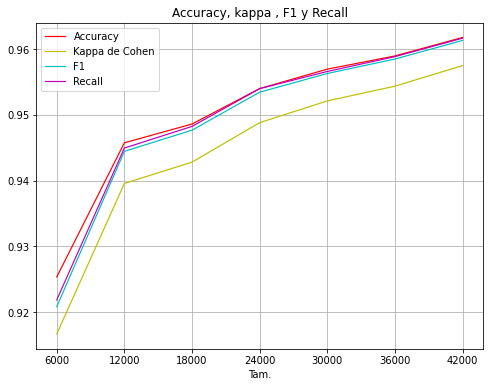

In [357]:
mean = meanAccuracy_PCA
mean2 = meanKappa_PCA
mean3 = meanF1_PCA
mean4 = meanRecall_PCA
r = 8
plt.figure(figsize=(8, 6))
plt.plot(range(1,r),mean, c="r", lw=1.2, label='Accuracy')
plt.plot(range(1,r),mean2, c="y", lw=1.2, label='Kappa de Cohen')
plt.plot(range(1,r),mean3, c="c", lw=1.2, label='F1')
plt.plot(range(1,r),mean4, c="m", lw=1.2, label='Recall')
plt.legend()
plt.grid()
plt.xticks(range(1,8),listaTamaños)


plt.title('Accuracy, kappa , F1 y Recall')
plt.xlabel('Tam.') 
plt.ylabel('')  
plt.savefig("Imagenes/estudiotampca-todo.png")
plt.show()


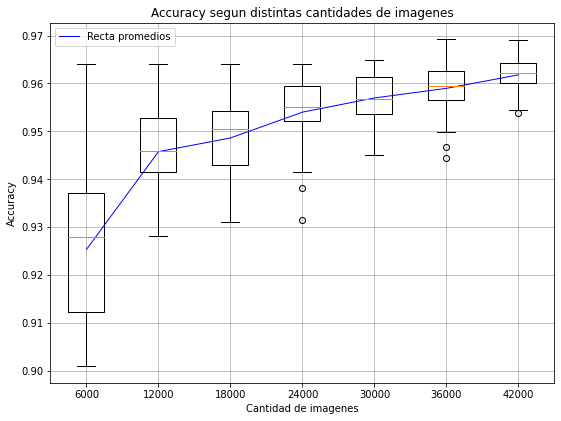

In [358]:
data = Accuracy_PCA
mean = meanAccuracy_PCA

fig = plt.figure(figsize =(7, 5))
  
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(data, range(0))
plt.plot()

listaTamaños = tam
plt.plot(range(1,8),mean, c="b", lw=1, label='Recta promedios')
plt.legend()
plt.grid()

plt.xticks(range(1,8),listaTamaños)

plt.title('Accuracy segun distintas cantidades de imagenes')
plt.xlabel('Cantidad de imagenes') 
plt.ylabel('Accuracy')  
plt.savefig("Imagenes/estudiotampca-accuracy.png")
plt.show()

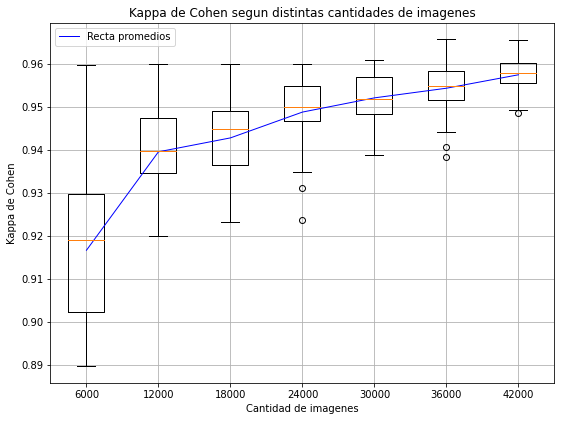

In [359]:
data = Kappa_PCA
mean = meanKappa_PCA

fig = plt.figure(figsize =(7, 5))
  
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(data, range(0))
plt.plot()

listaTamaños = tam
plt.plot(range(1,8),mean, c="b", lw=1, label='Recta promedios')
plt.legend()
plt.grid()

plt.xticks(range(1,8),listaTamaños)

plt.title('Kappa de Cohen segun distintas cantidades de imagenes')
plt.xlabel('Cantidad de imagenes') 
plt.ylabel('Kappa de Cohen')  
plt.savefig("Imagenes/estudiotampca-kappa.png")
plt.show()

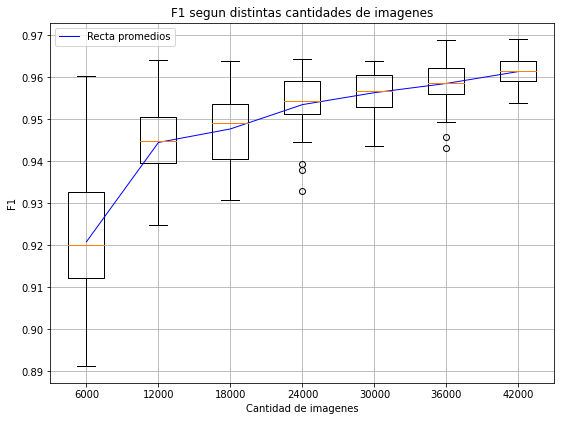

In [360]:
data = F1_PCA
mean = meanF1_PCA

fig = plt.figure(figsize =(7, 5))
  
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(data, range(0))
plt.plot()

listaTamaños = tam
plt.plot(range(1,8),mean, c="b", lw=1, label='Recta promedios')
plt.legend()
plt.grid()

plt.xticks(range(1,8),listaTamaños)

plt.title('F1 segun distintas cantidades de imagenes')
plt.xlabel('Cantidad de imagenes') 
plt.ylabel('F1')  
plt.savefig("Imagenes/estudiotampca-f1.png")
plt.show()

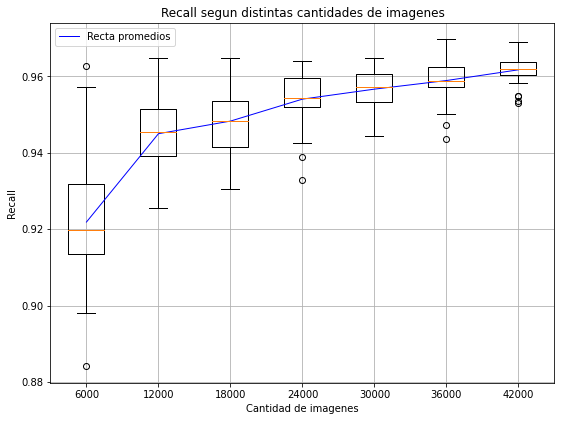

In [361]:
data = Recall_PCA
mean = meanRecall_PCA

fig = plt.figure(figsize =(7, 5))
  
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(data, range(0))
plt.plot()

listaTamaños = tam
plt.plot(range(1,8),mean, c="b", lw=1, label='Recta promedios')
plt.legend()
plt.grid()

plt.xticks(range(1,8),listaTamaños)

plt.title('Recall segun distintas cantidades de imagenes')
plt.xlabel('Cantidad de imagenes') 
plt.ylabel('Recall')  
plt.savefig("Imagenes/estudiotampca-recall.png")
plt.show()

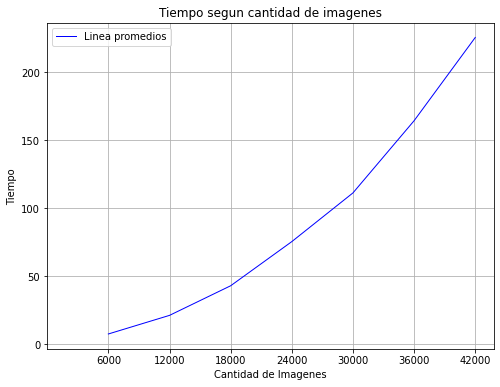

In [362]:

mean = Tiempo_PCA

plt.figure(figsize=(8, 6))
plt.plot(range(1,8),mean, c="b", lw=1, label='Linea promedios')
plt.legend()
plt.grid()
plt.xticks(range(0, 8))


plt.xticks(range(1,8),listaTamaños)
plt.title('Tiempo segun cantidad de imagenes')
plt.xlabel('Cantidad de Imagenes') 
plt.ylabel('Tiempo')  
plt.savefig("Imagenes/estudiotampca-tiempo.png")
plt.show()




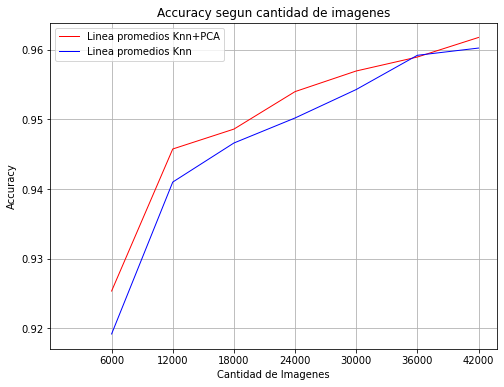

In [363]:

mean = meanAccuracy_PCA
mean2 = meanAccuracy_T
plt.figure(figsize=(8, 6))
plt.plot(range(1,8),mean, c="r", lw=1, label='Linea promedios Knn+PCA')
plt.plot(range(1,8),mean2, c="b", lw=1, label='Linea promedios Knn')
plt.legend()
plt.grid()
plt.xticks(range(0, 8))


plt.xticks(range(1,8),listaTamaños)
plt.title('Accuracy segun cantidad de imagenes')
plt.xlabel('Cantidad de Imagenes') 
plt.ylabel('Accuracy')  

plt.savefig("Imagenes/estudiotamvs-accuracy.png")
plt.show()



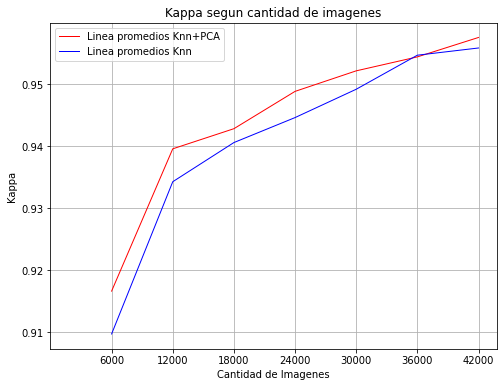

In [364]:

mean = meanKappa_PCA
mean2 = meanKappa_T
plt.figure(figsize=(8, 6))
plt.plot(range(1,8),mean, c="r", lw=1, label='Linea promedios Knn+PCA')
plt.plot(range(1,8),mean2, c="b", lw=1, label='Linea promedios Knn')
plt.legend()
plt.grid()
plt.xticks(range(0, 8))


plt.xticks(range(1,8),listaTamaños)
plt.title('Kappa segun cantidad de imagenes')
plt.xlabel('Cantidad de Imagenes') 
plt.ylabel('Kappa')  
plt.savefig("Imagenes/estudiotamvs-kappa.png")
plt.show()



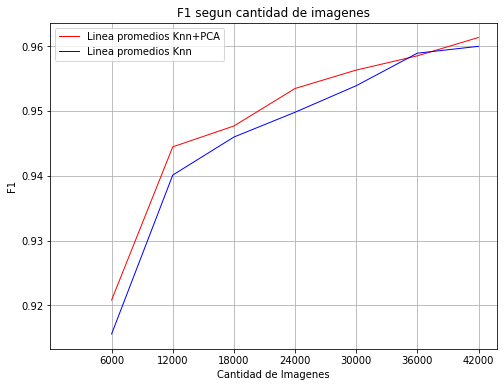

In [365]:

mean = meanF1_PCA
mean2 = meanF1_T
plt.figure(figsize=(8, 6))
plt.plot(range(1,8),mean, c="r", lw=1, label='Linea promedios Knn+PCA')
plt.plot(range(1,8),mean2, c="b", lw=1, label='Linea promedios Knn')
plt.legend()
plt.grid()
plt.xticks(range(0, 8))


plt.xticks(range(1,8),listaTamaños)
plt.title('F1 segun cantidad de imagenes')
plt.xlabel('Cantidad de Imagenes') 
plt.ylabel('F1')  
plt.savefig("Imagenes/estudiotamvs-af1.png")
plt.show()



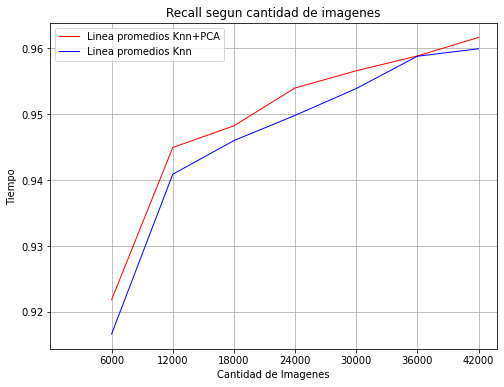

In [366]:

mean = meanRecall_PCA
mean2 = meanRecall_T
plt.figure(figsize=(8, 6))
plt.plot(range(1,8),mean, c="r", lw=1, label='Linea promedios Knn+PCA')
plt.plot(range(1,8),mean2, c="b", lw=1, label='Linea promedios Knn')
plt.legend()
plt.grid()
plt.xticks(range(0, 8))


plt.xticks(range(1,8),listaTamaños)
plt.title('Recall segun cantidad de imagenes')
plt.xlabel('Cantidad de Imagenes') 
plt.ylabel('Tiempo')  
plt.savefig("Imagenes/estudiotamvs-recall.png")
plt.show()



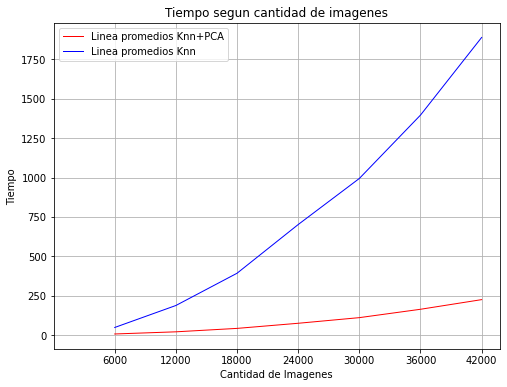

In [367]:

mean = Tiempo_PCA
mean2 = Tiempo_T
plt.figure(figsize=(8, 6))
plt.plot(range(1,8),mean, c="r", lw=1, label='Linea promedios Knn+PCA')
plt.plot(range(1,8),mean2, c="b", lw=1, label='Linea promedios Knn')
plt.legend()
plt.grid()
plt.xticks(range(0, 8))


plt.xticks(range(1,8),listaTamaños)
plt.title('Tiempo segun cantidad de imagenes')
plt.xlabel('Cantidad de Imagenes') 
plt.ylabel('Tiempo')  
plt.savefig("Imagenes/estudiotamvs-tiempo.png")
plt.show()



In [42]:
k = 10
C= 27
alpha = 24
tam = [500,1000,1500,2000,2500,3000,3500,4000,4500,5000,5500,6000]
Accuracy_PCA2 = []
Kappa_PCA2 = []
F1_PCA2 = []
Recall_PCA2 = []
Tiempo_PCA2 = []
for t in tam:
    datos = data_train.sample(t)
    Dtrain_t = datos[datos.columns[1:]].values
    valtrain_t = datos["label"].values
    print(f'## Tam = {t} \n')
    
    pcaInicio = time()
    pca = metnum.PCA(int(alpha))
    pca.fit(Dtrain_t)
    Dtrans = pca.transform(Dtrain_t)
    
    res = kNN_KFold(k, C, Dtrans, valtrain_t)
    
    pcaFin = time()
    pcaTiempo = pcaFin - pcaInicio
    
    Accuracy_PCA2.append(res[0])
    Kappa_PCA2.append(res[1])
    F1_PCA2.append(res[2])
    Recall_PCA2.append(res[3])
    Tiempo_PCA2.append(pcaTiempo)
    print('\n\n')
print("Fin.")


## Tam = 500 


Corte 1, 
fin.

Corte 2, 
fin.

Corte 3, 
fin.

Corte 4, 
fin.

Corte 5, 
fin.

Corte 6, 
fin.

Corte 7, 
fin.

Corte 8, 
fin.

Corte 9, 
fin.

Corte 10, 
fin.

Corte 11, 
fin.

Corte 12, 
fin.

Corte 13, 
fin.

Corte 14, 
fin.

Corte 15, 
fin.

Corte 16, 
fin.

Corte 17, 
fin.

Corte 18, 
fin.

Corte 19, 
fin.

Corte 20, 
fin.

Corte 21, 
fin.

Corte 22, 
fin.

Corte 23, 
fin.

Corte 24, 
fin.

Corte 25, 
fin.

Corte 26, 
fin.

Corte 27, 
fin.
Tiempo total: 0.024386882781982422



## Tam = 1000 



/home/lucas/metodos-tp2/tpenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lucas/metodos-tp2/tpenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lucas/metodos-tp2/tpenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lucas/metodos-tp2/tpenv/lib/python3.8/site-packages/sklearn/metrics


Corte 1, 
fin.

Corte 2, 
fin.

Corte 3, 
fin.

Corte 4, 
fin.

Corte 5, 
fin.

Corte 6, 
fin.

Corte 7, 
fin.

Corte 8, 
fin.

Corte 9, 
fin.

Corte 10, 
fin.

Corte 11, 
fin.

Corte 12, 
fin.

Corte 13, 
fin.

Corte 14, 
fin.

Corte 15, 
fin.

Corte 16, 
fin.

Corte 17, 
fin.

Corte 18, 
fin.

Corte 19, 
fin.

Corte 20, 
fin.

Corte 21, 


/home/lucas/metodos-tp2/tpenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


fin.

Corte 22, 
fin.

Corte 23, 
fin.

Corte 24, 
fin.

Corte 25, 
fin.

Corte 26, 
fin.

Corte 27, 
fin.
Tiempo total: 0.09081172943115234



## Tam = 1500 


Corte 1, 
fin.

Corte 2, 
fin.

Corte 3, 
fin.

Corte 4, 
fin.

Corte 5, 
fin.

Corte 6, 
fin.

Corte 7, 
fin.

Corte 8, 
fin.

Corte 9, 
fin.

Corte 10, 
fin.

Corte 11, 
fin.

Corte 12, 
fin.

Corte 13, 
fin.

Corte 14, 
fin.

Corte 15, 
fin.

Corte 16, 
fin.

Corte 17, 
fin.

Corte 18, 
fin.

Corte 19, 
fin.

Corte 20, 
fin.

Corte 21, 
fin.

Corte 22, 
fin.

Corte 23, 
fin.

Corte 24, 
fin.

Corte 25, 
fin.

Corte 26, 
fin.

Corte 27, 
fin.
Tiempo total: 0.1957082748413086



## Tam = 2000 


Corte 1, 
fin.

Corte 2, 
fin.

Corte 3, 
fin.

Corte 4, 
fin.

Corte 5, 
fin.

Corte 6, 
fin.

Corte 7, 
fin.

Corte 8, 
fin.

Corte 9, 
fin.

Corte 10, 
fin.

Corte 11, 
fin.

Corte 12, 
fin.

Corte 13, 
fin.

Corte 14, 
fin.

Corte 15, 
fin.

Corte 16, 
fin.

Corte 17, 
fin.

Corte 18, 
fin.

Corte 19, 
fin.

Corte 20, 
fin.

Corte 

In [44]:
k = 10
C= 27
tam = [500,1000,1500,2000,2500,3000,3500,4000,4500,5000,5500,6000]
Accuracy_T2 = []
Kappa_T2 = []
F1_T2 = []
Recall_T2 = []
Tiempo_T2 = []
for t in tam:
    datos = data_train.sample(t)
    Dtrain_t = datos[datos.columns[1:]].values
    valtrain_t = datos["label"].values
    print(f'## Tam = {t} \n')
    
    tInicio = time()
    res = kNN_KFold(k, C, Dtrain_t, valtrain_t)
    tFin = time()
    tTiempo = tFin - tInicio
    
    Accuracy_T2.append(res[0])
    Kappa_T2.append(res[1])
    F1_T2.append(res[2])
    Recall_T2.append(res[3])
    Tiempo_T2.append(tTiempo)
    print('\n\n')
print("Fin.")

## Tam = 500 


Corte 1, 
fin.

Corte 2, 
fin.

Corte 3, 
fin.

Corte 4, 
fin.

Corte 5, 
fin.

Corte 6, 
fin.

Corte 7, 
fin.

Corte 8, 
fin.

Corte 9, 
fin.

Corte 10, 
fin.

Corte 11, 
fin.

Corte 12, 


/home/lucas/metodos-tp2/tpenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lucas/metodos-tp2/tpenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lucas/metodos-tp2/tpenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lucas/metodos-tp2/tpenv/lib/python3.8/site-packages/sklearn/metrics

fin.

Corte 13, 
fin.

Corte 14, 
fin.

Corte 15, 
fin.

Corte 16, 
fin.

Corte 17, 
fin.

Corte 18, 
fin.

Corte 19, 
fin.

Corte 20, 
fin.

Corte 21, 
fin.

Corte 22, 
fin.

Corte 23, 
fin.


/home/lucas/metodos-tp2/tpenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lucas/metodos-tp2/tpenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lucas/metodos-tp2/tpenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lucas/metodos-tp2/tpenv/lib/python3.8/site-packages/sklearn/metrics


Corte 24, 
fin.

Corte 25, 
fin.

Corte 26, 
fin.

Corte 27, 
fin.
Tiempo total: 0.30698084831237793



## Tam = 1000 


Corte 1, 
fin.

Corte 2, 
fin.

Corte 3, 


/home/lucas/metodos-tp2/tpenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


fin.

Corte 4, 
fin.

Corte 5, 
fin.

Corte 6, 
fin.

Corte 7, 
fin.

Corte 8, 


/home/lucas/metodos-tp2/tpenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lucas/metodos-tp2/tpenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


fin.

Corte 9, 
fin.

Corte 10, 
fin.

Corte 11, 
fin.

Corte 12, 
fin.

Corte 13, 
fin.

Corte 14, 
fin.

Corte 15, 
fin.

Corte 16, 
fin.

Corte 17, 
fin.

Corte 18, 
fin.

Corte 19, 
fin.

Corte 20, 
fin.

Corte 21, 
fin.

Corte 22, 
fin.

Corte 23, 
fin.

Corte 24, 
fin.

Corte 25, 
fin.

Corte 26, 
fin.

Corte 27, 
fin.
Tiempo total: 1.0146546363830566



## Tam = 1500 


Corte 1, 
fin.

Corte 2, 
fin.

Corte 3, 
fin.

Corte 4, 
fin.

Corte 5, 
fin.

Corte 6, 
fin.

Corte 7, 
fin.

Corte 8, 
fin.

Corte 9, 
fin.

Corte 10, 
fin.

Corte 11, 
fin.

Corte 12, 
fin.

Corte 13, 
fin.

Corte 14, 
fin.

Corte 15, 
fin.

Corte 16, 
fin.

Corte 17, 
fin.

Corte 18, 
fin.

Corte 19, 
fin.

Corte 20, 
fin.

Corte 21, 
fin.

Corte 22, 
fin.

Corte 23, 
fin.

Corte 24, 
fin.

Corte 25, 
fin.

Corte 26, 
fin.

Corte 27, 
fin.
Tiempo total: 2.5128138065338135



## Tam = 2000 


Corte 1, 
fin.

Corte 2, 
fin.

Corte 3, 
fin.

Corte 4, 
fin.

Corte 5, 
fin.

Corte 6, 
fin.

Corte 7, 
fin.

Corte 

In [45]:
meanAccuracy_PCA2 = [np.mean(d) for d in Accuracy_PCA2]
meanKappa_PCA2 = [np.mean(d) for d in Kappa_PCA2]
meanF1_PCA2 = [np.mean(d) for d in F1_PCA2]
meanRecall_PCA2 = [np.mean(d) for d in Recall_PCA2]

meanAccuracy_T2 = [np.mean(d) for d in Accuracy_T2]
meanKappa_T2 = [np.mean(d) for d in Kappa_T2]
meanF1_T2 = [np.mean(d) for d in F1_T2]
meanRecall_T2 = [np.mean(d) for d in Recall_T2]

listaTamaños =[500,1000,1500,2000,2500,3000,3500,4000,4500,5000,5500,6000]

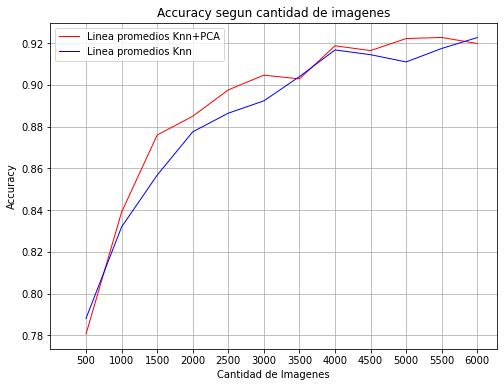

In [46]:

mean = meanAccuracy_PCA2
mean2 = meanAccuracy_T2
plt.figure(figsize=(8, 6))
plt.plot(range(1,13),mean, c="r", lw=1, label='Linea promedios Knn+PCA')
plt.plot(range(1,13),mean2, c="b", lw=1, label='Linea promedios Knn')
plt.legend()
plt.grid()
plt.xticks(range(0, 12))


plt.xticks(range(1,13),listaTamaños)
plt.title('Accuracy segun cantidad de imagenes')
plt.xlabel('Cantidad de Imagenes') 
plt.ylabel('Accuracy')  

plt.savefig("Imagenes/estudiotampeqvs-accuracy.png")
plt.show()


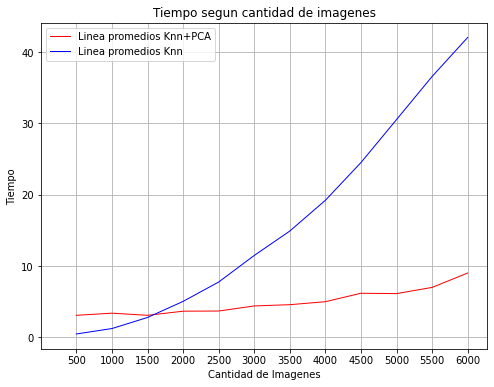

In [47]:
mean = Tiempo_PCA2
mean2 = Tiempo_T2
plt.figure(figsize=(8, 6))
plt.plot(range(1,13),mean, c="r", lw=1, label='Linea promedios Knn+PCA')
plt.plot(range(1,13),mean2, c="b", lw=1, label='Linea promedios Knn')
plt.legend()
plt.grid()
plt.xticks(range(0, 12))


plt.xticks(range(1,13),listaTamaños)
plt.title('Tiempo segun cantidad de imagenes')
plt.xlabel('Cantidad de Imagenes') 
plt.ylabel('Tiempo')  
plt.savefig("Imagenes/estudiotampeqvs-tiempo.png")
plt.show()


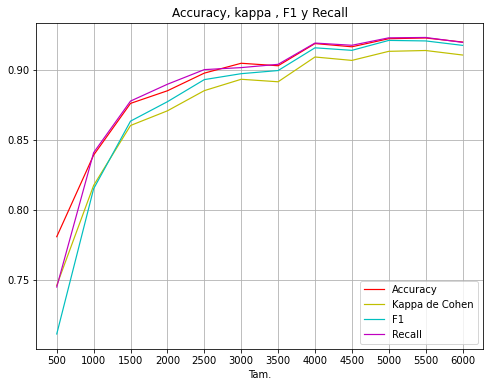

In [48]:
mean = meanAccuracy_PCA2
mean2 = meanKappa_PCA2
mean3 = meanF1_PCA2
mean4 = meanRecall_PCA2
r = 13
plt.figure(figsize=(8, 6))
plt.plot(range(1,r),mean, c="r", lw=1.2, label='Accuracy')
plt.plot(range(1,r),mean2, c="y", lw=1.2, label='Kappa de Cohen')
plt.plot(range(1,r),mean3, c="c", lw=1.2, label='F1')
plt.plot(range(1,r),mean4, c="m", lw=1.2, label='Recall')
plt.legend()
plt.grid()
plt.xticks(range(1,r),listaTamaños)


plt.title('Accuracy, kappa , F1 y Recall')
plt.xlabel('Tam.') 
plt.ylabel('')  
plt.savefig("Imagenes/estudiotampcapeq-todo.png")
plt.show()


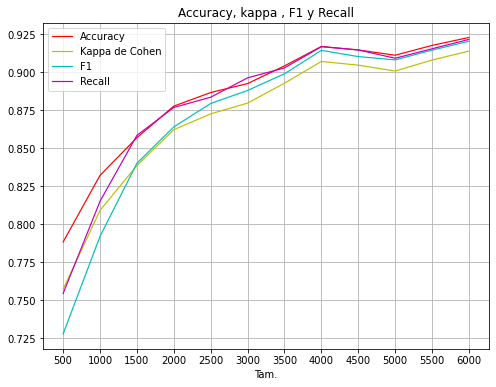

In [49]:
mean = meanAccuracy_T2
mean2 = meanKappa_T2
mean3 = meanF1_T2
mean4 = meanRecall_T2
r = 13
plt.figure(figsize=(8, 6))
plt.plot(range(1,r),mean, c="r", lw=1.2, label='Accuracy')
plt.plot(range(1,r),mean2, c="y", lw=1.2, label='Kappa de Cohen')
plt.plot(range(1,r),mean3, c="c", lw=1.2, label='F1')
plt.plot(range(1,r),mean4, c="m", lw=1.2, label='Recall')
plt.legend()
plt.grid()
plt.xticks(range(1,r),listaTamaños)


plt.title('Accuracy, kappa , F1 y Recall')
plt.xlabel('Tam.') 
plt.ylabel('')  
plt.savefig("Imagenes/estudiotampeq-todo.png")
plt.show()
